<a href="https://colab.research.google.com/github/TGunaSree/Sentiment_Analysis/blob/main/Sentiment_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Restaurant_Reviews.csv')


In [ ]:
data.shape


(1000, 2)

In [ ]:
data.columns


Index(['Review', 'Liked'], dtype='object')

In [ ]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
data.info

<bound method DataFrame.info of                                                 Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]>

In [ ]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
data.columns

Index(['Review', 'Liked'], dtype='object')

In [ ]:
nltk.download('wordnet')
corpus =[]
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
for i in range(len(data)):
   # Remove non-alphabetic characters and replace with space
   review = re.sub('[^a-zA-Z]', ' ', data['Review'][i])
   review = review.lower()
   review_words = review.split()
   custom_stopwords = set(stopwords.words('english') ) - {'not'}
   review_words = [lemmatizer.lemmatize(word) for word in review_words if word not in custom_stopwords]

   # Join the processed words back into a string
   review = ' '.join(review_words)
   corpus.append(review)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
corpus[:1500]

['wow loved place',
 'crust not good',
 'not tasty texture nasty',
 'stopped late may bank holiday rick steve recommendation loved',
 'selection menu great price',
 'getting angry want damn pho',
 'honeslty taste fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fry great',
 'great touch',
 'service prompt',
 'would not go back',
 'cashier care ever say still ended wayyy overpriced',
 'tried cape cod ravoli chicken cranberry mmmm',
 'disgusted pretty sure human hair',
 'shocked sign indicate cash',
 'highly recommended',
 'waitress little slow service',
 'place not worth time let alone vega',
 'not like',
 'burrittos blah',
 'food amazing',
 'service also cute',
 'could care less interior beautiful',
 'performed',
 'right red velvet cake ohhh stuff good',
 'never brought salad asked',
 'hole wall great mexican street taco friendly staff',
 'took hour get food table restaurant food luke warm sever running around like totally overwhelmed',
 'worst salmon sashimi',
 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1500,ngram_range=(1,2),stop_words = 'english')
X =tfidf.fit_transform(corpus).toarray()
y = data.iloc[:,1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.20, random_state=0)

In [ ]:
X_train.shape,X_test.shape, y_train.shape,y_test.shape

((800, 1500), (200, 1500), (800,), (200,))

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
params = {'alpha':[0.1,0.3,0.5,1.0]}
grid = GridSearchCV(MultinomialNB(),param_grid=params,cv=5,n_jobs=-1)
grid.fit(X_train,y_train)



GridSearchCV(cv=5, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.1, 0.3, 0.5, 1.0]})

In [ ]:
y_pred = grid.predict(X_test)

y_pred

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0])

In [ ]:
from sklearn.metrics import accuracy_score

from sklearn.metrics import precision_score

from sklearn.metrics import recall_score

score1 =accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred,average = 'binary')
score3 = recall_score(y_test,y_pred,average = 'binary')

print("---------SCORES--------")
print("Accuracy score is {}%".format(round(score1*100,3)))
print("Precision score is {}%".format(round(score2*100,3)))
print("recall score is {}%".format(round(score3*100,3)))

---------SCORES--------
Accuracy score is 78.0%
Precision score is 78.095%
recall score is 79.612%


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm

array([[74, 23],
       [21, 82]])

Text(95.72222222222221, 0.5, 'Actual Values')

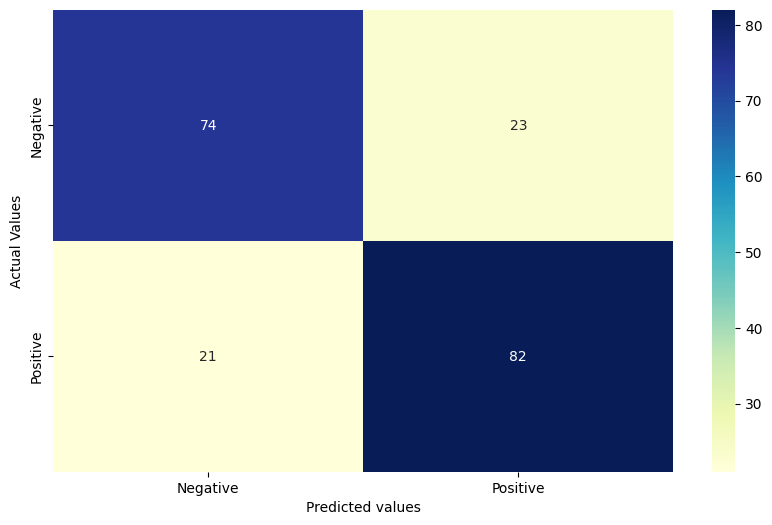

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize =(10,6))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=['Negative','Positive'],yticklabels=['Negative','Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual Values')

In [ ]:
from ssl import ALERT_DESCRIPTION_HANDSHAKE_FAILURE
best_accuracy =0.0
alpha_val =0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier =MultinomialNB(alpha=i)
  temp_classifier.fit(X_train,y_train)
  temp_y_pred =temp_classifier.predict(X_test)
  score = accuracy_score(y_test,temp_y_pred)
  print("Accuracy Score for alpha={} is {}%".format(round(i,1),round(score*100,3)))
  if score>best_accuracy:
     best_accuracy=score
     alpha_val =i
print('----------------------------------------------------')
print("The Best Accuracy Score is {}% with alpha value as {}".format(round(best_accuracy*100, 2), round(alpha_val, 1)))

Accuracy Score for alpha=0.1 is 76.0%
Accuracy Score for alpha=0.2 is 76.5%
Accuracy Score for alpha=0.3 is 77.0%
Accuracy Score for alpha=0.4 is 78.0%
Accuracy Score for alpha=0.5 is 78.0%
Accuracy Score for alpha=0.6 is 78.5%
Accuracy Score for alpha=0.7 is 79.0%
Accuracy Score for alpha=0.8 is 79.0%
Accuracy Score for alpha=0.9 is 78.5%
Accuracy Score for alpha=1.0 is 78.5%
----------------------------------------------------
The Best Accuracy Score is 79.0% with alpha value as 0.7


In [ ]:
classifier =MultinomialNB(alpha=0.2)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.2)

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

def predict_sentiment(sample_review):
    lemmatizer = WordNetLemmatizer()

    # 1. Remove non-alphabetic characters
    sample_review = re.sub('[^a-zA-Z]', ' ', sample_review)

    # 2. Lowercase
    sample_review = sample_review.lower()

    # 3. Split into words
    words = sample_review.split()

    # 4. Remove stopwords, but keep 'not'
    custom_stopwords = set(stopwords.words('english')) - {'not'}
    words = [lemmatizer.lemmatize(word) for word in words if word not in custom_stopwords]

    # 5. Join back to string
    final_review = ' '.join(words)

    # 6. Vectorize using the same TF-IDF used in training
    temp = tfidf.transform([final_review]).toarray()

    # 7. Predict using trained classifier
    pred = classifier.predict(temp)
    return pred[0]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
sample_review ='The food is really bad.'

if predict_sentiment(sample_review):
  print("Positive review")

else:
  print("Negative review")

Negative review


In [ ]:
sample_review ='Food was pretty bad and the service was very slow'

if predict_sentiment(sample_review):
  print(" Positive review")

else:
  print(" Negative review")

 Negative review


In [ ]:
sample_review ='The food  was absolutely wonderful,from preparation to presentation, very pleasing.'

if predict_sentiment(sample_review):
  print("This is a Positive review")

else:
  print("This is a Negative review")

This is a Positive review


In [ ]:
sample_review ='food averag'

if predict_sentiment(sample_review):
  print("This is a Positive review")

else:
  print("This is a Negative review")



This is a Negative review


In [ ]:
sample_review ='the food is good'

if predict_sentiment(sample_review):
  print("This is a Positive review")

else:
  print("This is a Negative review")

This is a Positive review
